

# **Predicting Airline Customer Satisfaction**
## Phase 2: Predictive Modelling


<center> Names & IDs of group members </center> 

Names  | IDs
------------- | -------------
Matthew Bentham  | S3923076
John Murrowood  | S3923075
Isxaq Warsame  |  S3658179

__________

### Table of contents:
- [Introduction](#intro)
   - [ Phase 1 Summary](#ps)
   - [ Report Overview](#ro)
   - [ Overview of Methodology](#oom)
- [Predictive Modelling](#pm)
  - [Data Preperation](#fs)
    - [One-Hot-Encoding & Integer-Encoding](#ohe)
    - [Scaling](#s)
  - [Feature Selection](#fs)
  - [Model Fitting & Tuning](#mft)
  - [Neural Network Model Fitting & Tuning](#nnmft)
  - [Model Comparison](#mc)
- [Critique & Limitation](#cl)
- [Summary & Conclusions](#sc)
  - [Project Summary](#ps)
  - [Summary & Findings](#sf)
  - [Conclusion](#c)
- [References](#ref)



## INTRODUCTION <a name="intro"></a>

#### **Phase 1 Summary:** <a name="ps"></a>

Phase 1 of this report primarily consisted of preparing, analysing, and visualising Us airline passenger satisfaction survey data to improve the data’s overall usability and understand the key characteristics and trends present so that it’s suitable for building and training the machine learning models presented in Phase 2 of this report. 

To clean and pre-process the data we:

(1)	Imputed all missing values and non-applicable survey results    
(2)	Identified and imputed outliers present in the numerical descriptive features    
(3)	Randomly sampled 5000 rows to reduce computational intensity the model used in this phase

To further analyse the characteristics of the sampled data 12 visualisations with one, two and three variables were generated. Through this we were able to identify the underappreciation of neutral/dissatisfied customers in our data, in addition to multiple relationships found such as the strong positive relationship between loyalty and satisfaction. 

In order to further gain insight into the current field of Passenger satisfaction machine learning models, we also performed a literature review to identify the applications and consumer theories behind these classification algorithms to further inform Phase 2 of our report. 

##### **Data Source**: 

The US airline passenger satisfaction survey dataset was sourced from kaggle, uploaded by John D 2018. This dataset contains survey results for whether a customer was satisfied with the flight or not as well as passenger and flight information. The dataset also contains information on what parts of the flight service they were satisfied with or not satisifed with.

URL: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction)

#### **Report Overview:** <a name="ro"></a>
**INCOMPLETE**

This dataset contains information on whether customers were satisfied or not during there domestic flight within the USA. There is personal details of each traveller including age, gender, type of travel (personal or buisness), as well as information on the flight including in-flight duration, gate departure and if the flight was delayed. There is also a rating for which cutomers enjoyed certain aspects of the flight such as inflight wifi, cleanliness, leg room and other things. These features will then be used for a classification problem to predict the target feature of whether a customer will be satisfied or not.

The dataset has 24 features, split into descriptive features and survey response features, including the target feature and 129,880 observations before any pre processing is preformed on the dataset.

##### **Overview of Methodology** <a name="oom"></a>

**INCOMPLETE**

- The data was downloaded from kaggle as a xlsx file. Link: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction) 
- As the data file is in the same github directory as this report 'satisfaction.xlsx' can be read directly 
- The first 10 rows are displayed 

In [1]:
# Reading in required packages, and setting up warnings filter
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
import random

random.seed(999)


airplane_df = pd.read_csv('satisfaction_cleaned_5000_v2.csv')
airplane_df.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,...,Inflight Entertainment,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction
0,Male,Loyal,37,Business,Business,418,0.0,0.0,3,3,...,4,2,4,4,5,4,5,4,2,Satisfied
1,Male,Loyal,55,Business,Business,2381,5.0,1.0,5,5,...,5,4,4,4,4,4,5,4,4,Satisfied
2,Female,Loyal,37,Business,Eco,1094,0.0,0.0,4,2,...,4,4,4,2,4,2,2,1,4,Satisfied
3,Male,Loyal,43,Business,Business,302,62.0,38.0,1,1,...,4,4,5,5,5,5,5,5,5,Satisfied
4,Male,Loyal,23,Business,Business,5040,1.0,0.0,5,5,...,4,4,4,5,4,5,4,4,4,Satisfied
5,Female,Disloyal,26,Business,Eco,1863,51.0,54.0,4,2,...,4,4,1,1,5,2,1,1,1,Dissatisfied
6,Male,Loyal,65,Personal,Eco,1745,8.0,11.0,2,4,...,2,5,5,5,3,5,3,4,5,Dissatisfied
7,Male,Loyal,56,Business,Business,1860,0.0,0.0,4,4,...,5,5,5,5,5,5,5,5,4,Satisfied
8,Male,Loyal,47,Business,Business,1416,2.0,0.0,5,5,...,5,4,4,4,4,4,4,4,4,Satisfied
9,Female,Loyal,40,Personal,Eco,2654,0.0,9.0,4,4,...,4,1,1,4,2,4,5,5,1,Dissatisfied


- Checking data types

In [2]:
airplane_df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfacti

## **Predictive Modelling** <a name = "pm"></a>

### Further pre-processing
#### **Discretization PLS PROVIDE INPUT READ BELOW**


**After reading some articles im beginning to wonder whether this step is necessary please provide some input for now  ill comment out the code below**



In the next step some of the data will be discretized. This has many benefits in machine learning applications of which some are listed below
- Significantly improves perfomance of classification of algorithms such as Suport Vector Machines and Random Forest
- Improves performance of Naive Bayes algorithm
- Easier to understand continuous variables
- Continuous features will have less of a  chance of correlating with the target variable due to limited degrees of freedom
- Reduces the impact of small fluctuations. Hence, reducing noise in our data.

For the following reasons above the Age, Flight Distance, Departure Delay and the Arrival Delay Features will be discretized.

In [3]:
# Still need to implement

from sklearn.preprocessing import KBinsDiscretizer
airplane_df.describe(include = ['int64', 'float64'], percentiles = [.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,5000.0,39.7618,14.915239,7.0,28.0,40.0,51.00,59.0,63.00,70.00,85.0
Flight Distance,5000.0,1951.2600,1019.096841,50.0,1320.0,1900.0,2524.25,3381.0,3799.10,4687.01,6734.0
Departure Delay in Minutes,5000.0,10.4888,21.020225,0.0,0.0,0.0,11.00,36.0,58.05,102.01,129.0
Arrival Delay in Minutes,5000.0,10.8522,21.224006,0.0,0.0,0.0,12.00,37.0,58.00,102.01,131.0
Seat Comfort,5000.0,2.9322,1.299516,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Departure/Arrival Time Convenient,5000.0,3.1156,1.390620,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Food and Drink,5000.0,2.9762,1.326343,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Gate Location,5000.0,2.9822,1.317205,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Inflight Wifi Service,5000.0,3.2698,1.294814,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Inflight Entertainment,5000.0,3.4586,1.256424,1.0,3.0,4.0,4.00,5.0,5.00,5.00,5.0


#### **One-Hot-Encoding & Integer-Encoding** <a name="ohe"></a>
- As the target feature for this dataset is either one of satisfied or neutral/dissastisfied we must integer-encode it. Normally, nominal descriptive features would never be integer-encoded.
- Normally, Sklearn would be used to do this but since we have a binary variably of either satisfied or neutral/dissastisfied we can continue with pandas.
- Through visual inspection, it was confirmed that the satisfied variable was correctly encoded as 1 and not a 0

In [4]:
# Creating a categorical columns list to be used with get_dummies()
categorical_cols = airplane_df.columns[airplane_df.dtypes==object].tolist()
categorical_cols
# CHecking dataframe pre-encoding


['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [5]:
airplane_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,...,Inflight Entertainment,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction
0,Male,Loyal,37,Business,Business,418,0.0,0.0,3,3,...,4,2,4,4,5,4,5,4,2,Satisfied
1,Male,Loyal,55,Business,Business,2381,5.0,1.0,5,5,...,5,4,4,4,4,4,5,4,4,Satisfied
2,Female,Loyal,37,Business,Eco,1094,0.0,0.0,4,2,...,4,4,4,2,4,2,2,1,4,Satisfied
3,Male,Loyal,43,Business,Business,302,62.0,38.0,1,1,...,4,4,5,5,5,5,5,5,5,Satisfied
4,Male,Loyal,23,Business,Business,5040,1.0,0.0,5,5,...,4,4,4,5,4,5,4,4,4,Satisfied


In [6]:
for i in categorical_cols:
    if (airplane_df[i].nunique() == 2): # if it has only two values, e.g, if its binary
        airplane_df[i] = pd.get_dummies(airplane_df[i], drop_first=True, dtype=np.int64)
   
# if it has more than two levels this is where the one hot encoding occurs for those cols
airplane_df = pd.get_dummies(airplane_df, dtype=np.int64)
airplane_df.head()  # Checking Dataframe post-encoding

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,37,0,418,0.0,0.0,3,3,3,...,4,5,4,5,4,2,1,1,0,0
1,1,1,55,0,2381,5.0,1.0,5,5,5,...,4,4,4,5,4,4,1,1,0,0
2,0,1,37,0,1094,0.0,0.0,4,2,2,...,2,4,2,2,1,4,1,0,1,0
3,1,1,43,0,302,62.0,38.0,1,1,1,...,5,5,5,5,5,5,1,1,0,0
4,1,1,23,0,5040,1.0,0.0,5,5,5,...,5,4,5,4,4,4,1,1,0,0


- Checking to see if the data types are all numeric after encoding

In [7]:
airplane_df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Flight Distance                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfaction                           int64
Class_Busi

### Scaling of Features <a name="s"></a>
Once One-Hot-Encoding has taken place the features are now scaled using min-max scaling

In [8]:
from sklearn import preprocessing

airplane_df_scaled = airplane_df.copy() # Copying dataframe
scaler = preprocessing.MinMaxScaler()   # setting caling function
airplane_arr = scaler.fit_transform(airplane_df_scaled)  # fitting and tranforming the dataframe

airplane_df_scaled = pd.DataFrame(airplane_arr, columns=airplane_df.columns)    # changing back to dataframe as sk learn only outputs a np array
airplane_df_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,1.0,0.384615,0.0,0.055057,0.000000,0.000000,0.50,0.50,0.50,...,0.75,1.00,0.75,1.00,0.75,0.25,1.0,1.0,0.0,0.0
1,1.0,1.0,0.615385,0.0,0.348743,0.038760,0.007634,1.00,1.00,1.00,...,0.75,0.75,0.75,1.00,0.75,0.75,1.0,1.0,0.0,0.0
2,0.0,1.0,0.384615,0.0,0.156194,0.000000,0.000000,0.75,0.25,0.25,...,0.25,0.75,0.25,0.25,0.00,0.75,1.0,0.0,1.0,0.0
3,1.0,1.0,0.461538,0.0,0.037702,0.480620,0.290076,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,0.0,0.0
4,1.0,1.0,0.205128,0.0,0.746559,0.007752,0.000000,1.00,1.00,1.00,...,1.00,0.75,1.00,0.75,0.75,0.75,1.0,1.0,0.0,0.0


### Feature Selection <a name="fs"></a>

In [9]:
X = airplane_df_scaled.drop("Satisfaction", axis = 1)  
    # Dropping the target variable
X = X.values    # Changing into numpy array

y = airplane_df_scaled["Satisfaction"]   # storing target variable "carat"
y = y.values        # Changing to numpy array

In [10]:
from sklearn.ensemble import RandomForestClassifier

num_features = 24
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(X, y)
fs_indices_rfi = np.argsort(model_rf.feature_importances_)[::-1][0:num_features]

best_features_rfi = airplane_df_scaled.drop("Satisfaction", axis = 1) .columns[fs_indices_rfi].values
best_features_rfi

array(['Inflight Entertainment', 'Ease of Online Booking', 'Seat Comfort',
       'Online Support', 'Customer Type', 'On-board Service',
       'Leg Room Service', 'Flight Distance', 'Online Boarding', 'Age',
       'Cleanliness', 'Gender', 'Check-in Service', 'Baggage Handling',
       'Food and Drink', 'Class_Business', 'Gate Location',
       'Departure/Arrival Time Convenient', 'Type of Travel',
       'Inflight Wifi Service', 'Class_Eco', 'Arrival Delay in Minutes',
       'Departure Delay in Minutes', 'Class_Eco Plus'], dtype=object)

In [11]:
feat_imp = model_rf.feature_importances_[fs_indices_rfi]
feat_imp

array([0.21002187, 0.09015745, 0.08036291, 0.05318132, 0.05249118,
       0.05014509, 0.04538006, 0.03994206, 0.03721342, 0.03567809,
       0.03340611, 0.02960875, 0.02909158, 0.027834  , 0.02606418,
       0.02276679, 0.02264863, 0.02178695, 0.02031246, 0.02000778,
       0.01733356, 0.01668248, 0.01477326, 0.00310999])

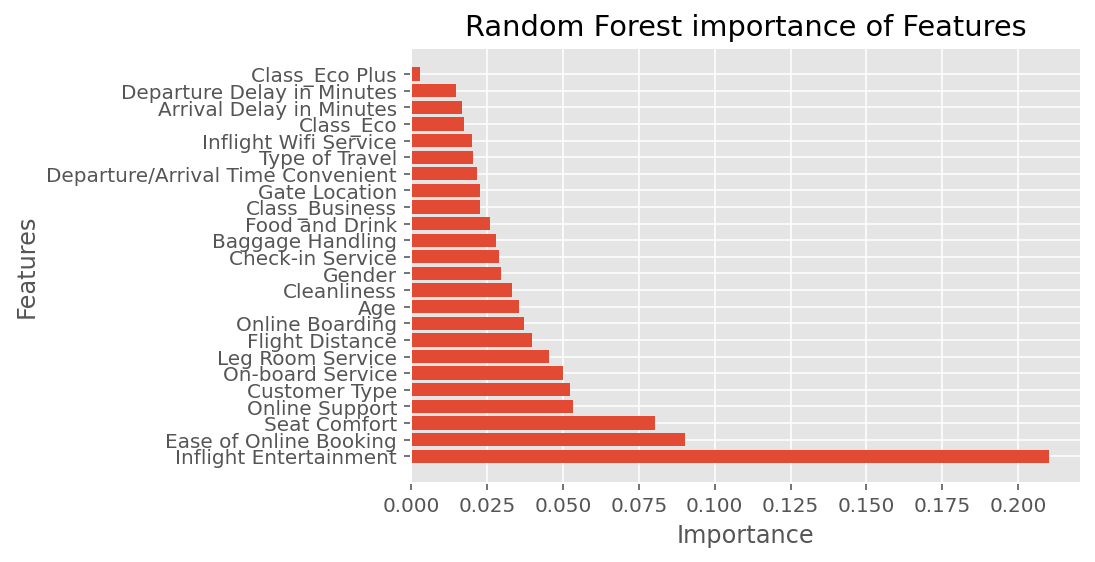

In [12]:
def importance_plot(b_feat, score, method):   
    plt.barh(b_feat, score)
    plt.title(method+ ' importance of Features')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

importance_plot(best_features_rfi, feat_imp, 'Random Forest')

In [13]:
# Top 15 features by importance
feats = ['Inflight Entertainment', 'Ease of Online Booking', 'Seat Comfort',
       'Online Support', 'Leg Room Service', 'Customer Type',
       'Flight Distance', 'On-board Service', 'Age', 'Online Boarding',
       'Check-in Service', 'Cleanliness', 'Gender', 'Baggage Handling',
       'Food and Drink']

In [14]:
from sklearn.model_selection import train_test_split

d_sample = airplane_df_scaled.drop("Satisfaction", axis = 1).values 
d_target = airplane_df_scaled['Satisfaction'].values

d_train, d_test, t_train, t_test = train_test_split(d_sample, d_target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = d_target)

print(d_train.shape)
print(d_test.shape)

(3500, 24)
(1500, 24)


### Model Fitting & Tuning <a name="mft"></a>

#### KNN

In [15]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV       

cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

In [16]:

from sklearn.base import BaseEstimator, TransformerMixin

# function for random forest importance inside a pipeline
# unsing n_estimor = 100
class RF_Feat_Selector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=15):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RF_Feat_Selector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 15, 20, 24],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [0.5, 1, 2, 5]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [17]:
len(d_target)

5000

In [18]:
gs_pipe_KNN.fit(d_train, t_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-2,
             param_grid={'knn__n_neighbors': [1, 5, 10, 15, 20],
                         'knn__p': [0.5, 1, 2, 5],
                         'rfi_fs__n_features_': [10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [19]:
print(f'Best Params: {gs_pipe_KNN.best_params_}')
print(f'Best Score: {gs_pipe_KNN.best_score_}')

Best Params: {'knn__n_neighbors': 15, 'knn__p': 1, 'rfi_fs__n_features_': 20}
Best Score: 0.9736331547898205


In [20]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
54,0.973633,0.003636,0.977361,0.968241,15.0,1.0,20.0
70,0.972136,0.004094,0.977666,0.966858,20.0,1.0,20.0
38,0.971521,0.005019,0.977489,0.964908,10.0,1.0,20.0
55,0.970896,0.003459,0.974983,0.964526,15.0,1.0,24.0
71,0.970651,0.002887,0.973519,0.965373,20.0,1.0,24.0


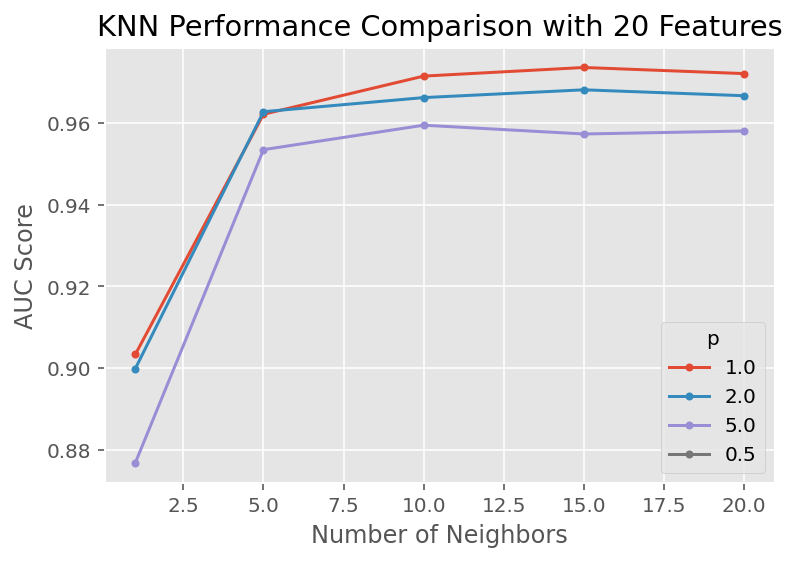

In [21]:
results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == gs_pipe_KNN.best_params_['rfi_fs__n_features_']]

for i in results_KNN_10_features['knn__p'].unique():
    
    temp = results_KNN_10_features[results_KNN_10_features['knn__p'] == i]
    lists = sorted(zip(*[temp['knn__n_neighbors'], temp['mean_score']]))
    new_x, new_y = list(zip(*lists))
    plt.plot(new_x, new_y, marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title(f"KNN Performance Comparison with {gs_pipe_KNN.best_params_['rfi_fs__n_features_']} Features")
plt.show()

**FINAL MODEL**

In [22]:
# Using best parameters on model and testing with Test data.
from sklearn.metrics import classification_report, accuracy_score , roc_auc_score
d_train_final = d_train[:, np.r_[fs_indices_rfi[0:20]]]
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:20]]]
np.random.seed(999)
knn_classifier = KNeighborsClassifier(n_neighbors=10, p=1)
knn_classifier.fit(d_train_final, t_train)
y_predict = knn_classifier.predict(d_test_final)


print('Accuracy score:',accuracy_score(t_test,y_predict))
print('AUC score:',roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

Accuracy score: 0.908
AUC score: 0.9102616256668776
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       683
         1.0       0.94      0.88      0.91       817

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



#### Naive Bayes (NB) (Gaussian)

In [23]:
from sklearn.preprocessing import PowerTransformer
d_train_transformed = PowerTransformer().fit_transform(d_train)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(d_train_transformed, t_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
                   estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                             ('nb', GaussianNB())]),
                   n_iter=20, n_jobs=-2,
                   param_distributions={'nb__var_smoothing': array([1.00000000e+01, 9.54771611e+00, 9.11588830e+00, 8.70359136e+00,
       8.30994195e+00, 7.93409667e+00, 7.57525026e+00, 7.23263390e+00,
       6.90...
       2.40940356e-03, 2.30043012e-03, 2.19638537e-03, 2.09704640e-03,
       2.00220037e-03, 1.91164408e-03, 1.82518349e-03, 1.74263339e-03,
       1.66381689e-03, 1.58856513e-03, 1.51671689e-03, 1.44811823e-03,
       1.38262217e-03, 1.32008840e-03, 1.26038293e-03, 1.20337784e-03,
       1.14895100e-03, 1.09698580e-03, 1.04737090e-03, 1.00000000e-03]),
                                        'rfi_fs__n_features_': [5, 10, 15, 20,
                                                                24]},
      

In [25]:
print(f'Best Params: {gs_pipe_NB.best_params_}')
print(f'Best Score: {gs_pipe_NB.best_score_}')
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

Best Params: {'rfi_fs__n_features_': 24, 'nb__var_smoothing': 0.001096985797892383}
Best Score: 0.9286451262557698


,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
8,0.928645,0.009048,0.938448,0.916463,24.0,0.001097
5,0.925087,0.009320,0.940538,0.911148,15.0,0.283310
9,0.924834,0.009452,0.939970,0.913057,15.0,0.051114
2,0.923917,0.009963,0.938596,0.908589,20.0,0.594113
0,0.922950,0.013686,0.943426,0.906878,15.0,0.004199


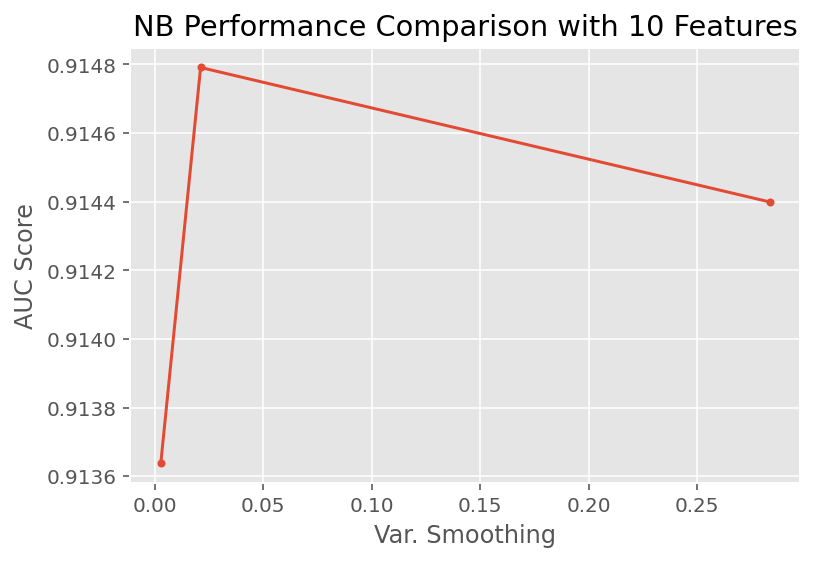

In [26]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0].sort_values('nb__var_smoothing')

plt.plot(results_NB_10_features['nb__var_smoothing'], results_NB_10_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 10 Features")
plt.show()

#### Decision Tree (DT)

In [27]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RF_Feat_Selector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  'dt__max_depth': [3, 4, 5, 10],
                  'dt__min_samples_split': [1, 2, 5, 10]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(d_train, t_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=111))]),
             n_jobs=-2,
             param_grid={'dt__max_depth': [3, 4, 5, 10],
                         'dt__min_samples_split': [1, 2, 5, 10],
                         'rfi_fs__n_features_': [5, 10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [28]:
print(f'Best Params: {gs_pipe_DT.best_params_}')
print(f'Best Score: {gs_pipe_DT.best_score_}')
results_DT = get_search_results(gs_pipe_DT)
results_DT_5_features = results_DT[results_DT['rfi_fs__n_features_'] == 5.0]

Best Params: {'dt__max_depth': 10, 'dt__min_samples_split': 10, 'rfi_fs__n_features_': 5}
Best Score: 0.9405162129028541


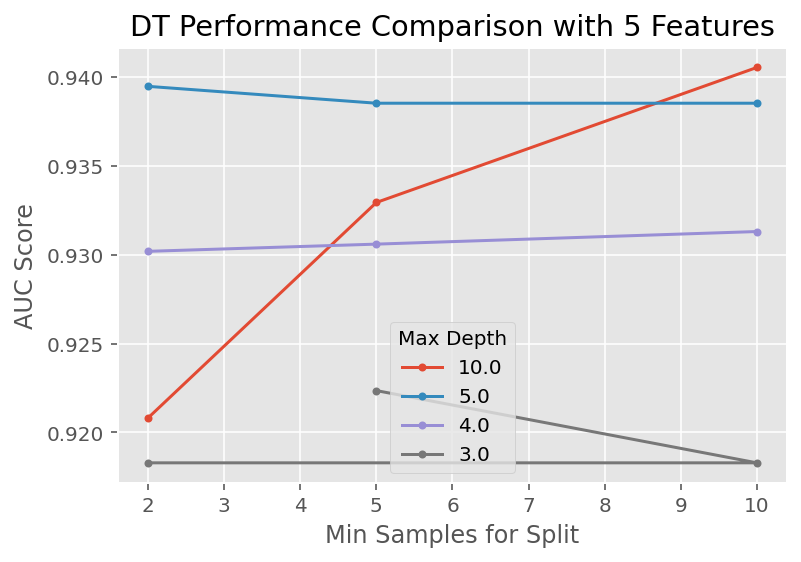

In [29]:
for i in results_DT_5_features['dt__max_depth'].unique():
    temp = results_DT_5_features[results_DT_5_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 5 Features")
plt.show()

#### Linear Regeression (LR)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score


reg = LinearRegression()

pipe_LR = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('lr', LinearRegression())])


params_pipe_LR = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  'lr__fit_intercept'  :    [True, False]}



gs_pipe_LR = GridSearchCV(estimator=pipe_LR, 
                          param_grid=params_pipe_LR, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 




In [31]:
gs_pipe_LR.fit(d_train, t_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('lr', LinearRegression())]),
             n_jobs=-2,
             param_grid={'lr__fit_intercept': [True, False],
                         'rfi_fs__n_features_': [5, 10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [32]:
print(f'Best Params: {gs_pipe_LR.best_params_}')
print(f'Best Score: {gs_pipe_LR.best_score_}')
results_LR = get_search_results(gs_pipe_LR)
results_LR.head()

Best Params: {'lr__fit_intercept': True, 'rfi_fs__n_features_': 24}
Best Score: 0.9408946922387053


,mean_score,std_score,max_score,min_score,lr__fit_intercept,rfi_fs__n_features_
4,0.940895,0.002865,0.946355,0.938201,True,24
9,0.940895,0.002865,0.946355,0.938201,False,24
3,0.940625,0.002991,0.946527,0.938497,True,20
2,0.936674,0.004441,0.944627,0.931462,True,15
8,0.931058,0.004797,0.935996,0.922272,False,20


#### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


# log_reg = LogisticRegression()

pipe_LogR = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('logr', LogisticRegression())])


params_pipe_LogR = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  #'logr_dual'  :    [True, False],
                  #'logr_tol'   :    [0.0001, 0.001, 0.01, 0.1, 1],
                  'logr__penalty'     :    ['l1','l2'],
                  'logr__C'     :    [0.1, 1, 10, 100, 1000]}



gs_pipe_LogR = GridSearchCV(estimator = pipe_LogR, 
                          param_grid = params_pipe_LogR, 
                          cv = cv_method,
                          refit = True,
                          n_jobs = -1,
                          scoring = 'roc_auc',
                          verbose = 1) 


gs_pipe_LogR.fit(d_train, t_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('logr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logr__C': [0.1, 1, 10, 100, 1000],
                         'logr__penalty': ['l1', 'l2'],
                         'rfi_fs__n_features_': [5, 10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [34]:
print(f'Best Params: {gs_pipe_LogR.best_params_}')
print(f'Best Score: {gs_pipe_LogR.best_score_}')
results_LogR = get_search_results(gs_pipe_LogR)
results_LogR.head()

Best Params: {'logr__C': 1, 'logr__penalty': 'l2', 'rfi_fs__n_features_': 24}
Best Score: 0.9411184887155561


,mean_score,std_score,max_score,min_score,logr__C,logr__penalty,rfi_fs__n_features_
19,0.941118,0.003467,0.947507,0.937172,1,l2,24
29,0.941023,0.003525,0.947564,0.937074,10,l2,24
39,0.941005,0.003535,0.947531,0.936983,100,l2,24
49,0.940992,0.003552,0.947548,0.936967,1000,l2,24
18,0.940972,0.003294,0.94735,0.938291,1,l2,20


#### SVM

In [36]:
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC
 

pipe_SVM = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('svm', SVC())])




'''params_pipe_SVM = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                    'svm__C': [0.1, 1, 10, 100, 1000],
                    'dual': [True,False],
                    'loss': ['hinge', 'squared_hinge']}'''
 


params_pipe_SVM = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                   'svm__C': [0.1, 1, 10, 100, 1000],
                    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                    'svm__kernel': ['rbf', 'linear', 'poly']
                   }

gs_pipe_SVM = GridSearchCV(estimator=pipe_SVM, 
                           param_grid=params_pipe_SVM, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 
 


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
 

pipe_SVM = Pipeline(steps=[('rfi_fs', RF_Feat_Selector()), 
                     ('svm', SVC())])

params_pipe_SVM = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                   'svm__C': [0.1, 1, 10, 100, 1000],
                    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                    'svm__kernel': ['rbf', 'linear', 'poly']
                   }

 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

gs_pipe_SVM = GridSearchCV(estimator=pipe_SVM, 
                           param_grid=params_pipe_SVM, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 
 
gs_pipe_SVM.fit(d_train, t_train)

In [37]:
gs_pipe_SVM.fit(d_train, t_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('svm', SVC())]),
             n_jobs=-2,
             param_grid={'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                         'svm__C': [0.1, 1, 10, 100, 1000],
                         'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='roc_auc', verbose=1)

Best Params: {'rfi_fs__n_features_': 24, 'svm__C': 10, 'svm__gamma': 0.1}
Best Score: 0.9777289594286609


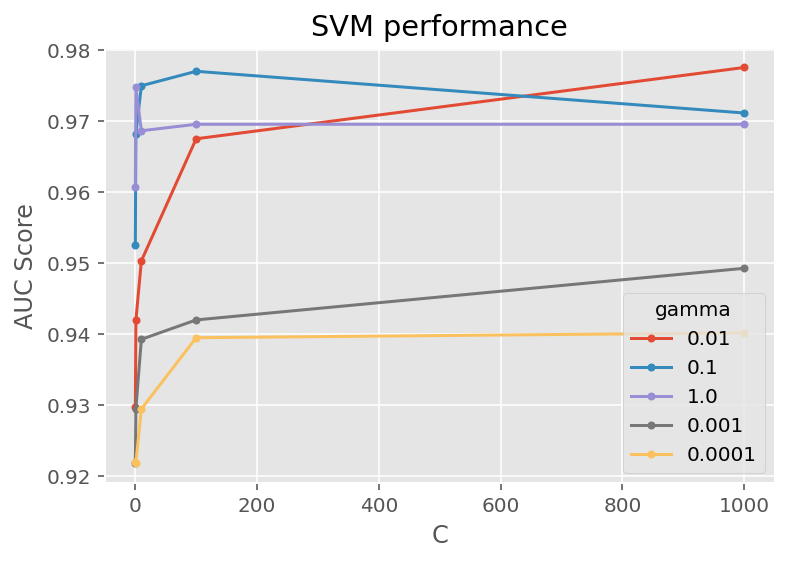

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,svm__C,svm__gamma
111,0.977729,0.003918,0.981520,0.971170,24.0,10.0,0.10
97,0.977550,0.004207,0.982680,0.971754,20.0,1000.0,0.01
122,0.977489,0.003837,0.981199,0.971170,24.0,1000.0,0.01
91,0.977013,0.002235,0.980829,0.974420,20.0,100.0,0.10
116,0.976491,0.003306,0.981742,0.973622,24.0,100.0,0.10


In [38]:
print(f'Best Params: {gs_pipe_SVM.best_params_}')
print(f'Best Score: {gs_pipe_SVM.best_score_}')
results_SVM = get_search_results(gs_pipe_SVM)
results_SVM = results_SVM[results_SVM['rfi_fs__n_features_'] == 20.0]

for i in results_SVM['svm__gamma'].unique():
   
   temp = results_SVM[results_SVM['svm__gamma'] == i]
   lists = sorted(zip(*[temp['svm__C'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = "gamma")
plt.xlabel('C')
plt.ylabel("AUC Score")
plt.title("SVM performance")
plt.show()
results_SVM = get_search_results(gs_pipe_SVM)
results_SVM.head()

### Neural Network Model Fitting & Tuning: <a name="nmft"></a>

#### Topology of Nueral Network

The topology of our neural network consists of 24 input features with 1 input layer, 2 hidden layers each with their respective dropout layer (which is used to reduce the chance of overfitting) and an output layer. Only 2 hidden layers were used for our neural architecture to limit the computational intensity of further hyperparameter tuning. As not all the parameters of our neural network were tuned, optimal static values were chosen for binary classification purposes. These values include: 
-	**Optimizer used:** Stochastic gradient descent with a decay of 1e^-6 and momentum of 0.5  
        ->  Stochastic gradient descent is a popular optimizer algorithm for finding the optimal model parameters that correspond to the best fit. It is a gradient descent algorithm in which the gradient is calculated using only a small part of observations to reduce computation time 
-	**Metrics used:** Accuracy 
-	**Output activation function:** sigmoid  
        -> Sigmoid functions must be used as the output activation function for binary classification problems whose output is always between 0 and 1

In additional to these default values, hyperparameter tuning was also performed incrementally on: 
-	Batch size: size of data to input into the neural network at each training iteration 
-	Epochs: Number of training iterations (large values lead to over fitting, small values lead to under fitting) 
-	Learning rate of SGD optimizer: step size that the SGD algorithm takes after each training iteration 
-	Dropout rate for dropout layers: the amount of randomly selected neurons that are ignored during training (too high can slow the coverage rate of the model and too low leads to less improvements on generalisation)  
-	Number of neurons in each activation layer 
-	Activation function: defines how the weighted sum of the input is transformed into an output  
-	Keneral initializer used 

All hyperparameter tuning was performed using stratified k-fold validation with 5 folds and the AUC metric used for model evaluation. Before hyperparameter random values (within reasonable range) for these parameters were chosen as seen below:

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
kernel_init = 'normal'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
layer1_units = 8
layer2_units = 4
learning_rate=0.01
decay=1e-6
momentum=0.5

loss = 'binary_crossentropy' 
metrics = ['accuracy']




To reduce the overall computation intensity and to construct a more interpretable narrative, this process was separated into 5 tunning steps: 

**Step 1: Tuning batch size and epochs**


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(layer1_units,input_dim = 24,kernel_initializer = kernel_init ,activation = layer1_activation))
    model.add(Dense(layer2_units,input_dim = 24,kernel_initializer = kernel_init ,activation = layer2_activation))
    model.add(Dense(1,activation = output_activation))
    
    opt = SGD(lr=learning_rate, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

In [ ]:

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 10,
                           scoring='roc_auc',error_score='raise')
grid_result = grid.fit(d_train,t_train)
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
print(f'Best Params: {grid_result.best_params_}')
print(f'Best Score: {grid_result.best_score_}')
results = get_search_results(grid_result)
for i in results['batch_size'].unique():
   
   temp = results[results['batch_size'] == i]
   lists = sorted(zip(*[temp['epochs'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'batch_size')
plt.xlabel('epochs')
plt.ylabel("AUC Score")
plt.title("NN performance")
plt.show()


**Step 2: Tuning Learning rate of SGD** 

In [ ]:
from keras.layers import Dropout
def create_model(learning_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(4,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=learning_rate, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
learning_rate = [0.0001,0.001,0.01,0.1]
param_grids = dict(learning_rate = learning_rate)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,
                           scoring='roc_auc',error_score='raise')
grid_result1 = grid.fit(d_train,t_train)

In [ ]:
print(f'Best Params: {grid_result1.best_params_}')
print(f'Best Score: {grid_result1.best_score_}')
results = get_search_results(grid_result1)

   
temp = results
lists = sorted(zip(*[temp['learning_rate'], temp['mean_score']]))
new_x, new_y = list(zip(*lists))
plt.plot(new_x, new_y, marker = '.', label = i)


plt.xlabel('learning_rate')
plt.ylabel("AUC Score")
plt.title("NN performance")
plt.show()

**Step 3:Tuning dropout rate of dropout layers**

In [ ]:
from keras.layers import Dropout
def create_model(layer1_dropout_rate,layer2_dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(4,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=0.1, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
layer1_dropout_rate = [0.0,0.05,0.1,0.15,0.2]
layer2_dropout_rate = [0.0,0.05,0.1,0.15,0.2]
param_grids = dict(layer2_dropout_rate = layer2_dropout_rate ,layer1_dropout_rate=layer1_dropout_rate )
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 10,
                           scoring='roc_auc',error_score='raise')
grid_result2 = grid.fit(d_train,t_train)

In [ ]:
print(f'Best Params: {grid_result2.best_params_}')
print(f'Best Score: {grid_result2.best_score_}')
results = get_search_results(grid_result2)



for i in results['layer1_dropout_rate'].unique():
   
   temp = results[results['layer1_dropout_rate'] == i]
   lists = sorted(zip(*[temp['layer2_dropout_rate'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'layer2_dropout_rate')
plt.xlabel('layer2_dropout_rate')
plt.ylabel("AUC Score")
plt.title("NN performance")
plt.show()

**Step 4: Tuning Number of Neurons in activation layer**

In [ ]:
def create_model(layer1_units,layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.05))
    model.add(Dense(layer2_units,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=0.1, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
layer1_units =[3,6,12,24,36]
layer2_units =[3,6,12,24]

param_grids = dict(layer1_units= layer1_units,layer2_units = layer2_units)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 10,
                           scoring='roc_auc',error_score='raise')
grid_result3 = grid.fit(d_train,t_train)

In [ ]:
print(f'Best Params: {grid_result3.best_params_}')
print(f'Best Score: {grid_result3.best_score_}')
results = get_search_results(grid_result3)



for i in results['layer1_units'].unique():
   
   temp = results[results['layer1_units'] == i]
   lists = sorted(zip(*[temp['layer2_units'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'layer2_units')
plt.xlabel('layer1_units')
plt.ylabel("AUC Score")
plt.title("NN performance")
plt.show()

In [1]:

# System.Data.SqlClient.SqlError: There is insufficient free space on disk volume 

# 'C:\' to create the database. The database requires 144830496768 additional free bytes, while only 136309747712 bytes are available. 

144830496768 - 136309747712

8520749056

**Step 5: Tuning Activation Function and Kernel Initializer**

In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 24,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.05))
    model.add(Dense(24,input_dim = 24,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=0.1, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids = dict(activation_function = activation_function,init = init)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 10,
                           scoring='roc_auc',error_score='raise')
grid_result4 = grid.fit(d_train,t_train)

In [ ]:

print(f'Best Params: {grid_result4.best_params_}')
print(f'Best Score: {grid_result4.best_score_}')
results = get_search_results(grid_result4)



for i in results['init'].unique():
   
   temp = results[results['init'] == i]
   lists = sorted(zip(*[temp['activation_function'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'layer2_units')
plt.xlabel('layer1_units')
plt.ylabel("AUC Score")
plt.title("NN performance")
plt.show()

**FINAL MODEL**  
The final topology of our neural network contains: 
-	An input layer which consists of the 24 scaled descriptive features 
-	Hidden layer 1 which consists of 48 neurons and uses a rectified linear unit activation function 
-	Hidden layer 2 which consist of 24 neurons and an relu activation function 
-	2 dropout layers corresponding to each hidden layer with a dropout rate of 0.05 and 0.15 respectively 


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Optimum values 
activation_function = 'relu'
Kernal_init = 'normal'
epochs = 100
batch_size = 10
learning_rate = 0.1
layer1_dropout_rate= 0.05
layer2_dropout_rate= 0.0
layer1_units=  24
layer2_units= 12


def create_model():
    model = Sequential()
    model.add(Dense(layer1_units,input_dim = 24,kernel_initializer = Kernal_init,activation = activation_function))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units,input_dim = 24,kernel_initializer =Kernal_init,activation = activation_function))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=learning_rate, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = batch_size,epochs = epochs)
np.random.seed(999)
model.fit(d_train,t_train)
y_predict = model.predict(d_test)
nn_roc=roc_auc_score(t_test,y_predict)
print(accuracy_score(t_test,y_predict))
print(roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

### Model Comparison: <a name="mc"></a>

## Critique & Limitation: <a name="r"></a>



## Summary & Conclusions: <a name="sum"></a>


### Project Summary: <a name="ps"></a>

### Summary & Findings: <a name="sf"></a>



## References: <a name="ref"></a>


In [ ]:
"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/" # Discretization    

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/'